<a href="https://colab.research.google.com/github/Wasabi-Bobby/MachineLearningHomework/blob/master/HW2_Machine_Learning_bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras.datasets import cifar10

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


Preparing image and labels
-------------



In [0]:
train_images_original.shape

(50000, 32, 32, 3)

In [0]:
test_images_original.shape

(10000, 32, 32, 3)

In [0]:
train_images = train_images_original.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

Some nice code snippet i found for shuffling two arrays on github. Link -> https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

In [0]:
import numpy as np
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

Testing this just in case
----------------------------
It works!

In [0]:
x = np.array([1,2,3,4])
y = np.array([1,2,3,4])
random_x, random_y = unison_shuffled_copies(x, y)
print(random_x)
print(random_y)

[2 1 3 4]
[2 1 3 4]


Shuffling step + Validation set
--------------------
Creating Validation and Test set from the data (Not k-fold iteration kind of validation)

Actually going to ignore this valid set section for now since keras has a way to set the percentage of a validation set...

In [0]:
#Shuffling array
random_train_images, random_train_labels = unison_shuffled_copies(train_images, train_labels)
#valid_set = [(random_train_images

Network Architecture 1
----------------------------
Just going to have about 4 convolutional layers and do four max pools

Basic architecture

In [2]:
from keras import models
from keras import layers

model_one = models.Sequential()
model_one.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
#model_one.add(layers.MaxPooling2D((2, 2)))
model_one.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_one.add(layers.MaxPooling2D(2, 2))
model_one.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_one.add(layers.Flatten())
model_one.add(layers.Dense(64, activation='relu'))
model_one.add(layers.Dense(10, activation='softmax'))
model_one.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 2,825,930
Trainable params: 2,825,930
Non-trainable para

Network Architecture 2
---------------------------
Now with maxpooling!

In [29]:
model_two = models.Sequential()
model_two.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_two.add(layers.MaxPooling2D((2, 2)))
model_two.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_two.add(layers.MaxPooling2D(2, 2))
model_two.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_two.add(layers.MaxPooling2D(2, 2))
model_two.add(layers.Flatten())
model_two.add(layers.Dense(64, activation='relu'))
model_two.add(layers.Dense(10, activation='softmax'))
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
__________

Network Architecture 3, 4, 5, 6
-----------------------------
Just kinda messing around with different layers and pooling and the epochs should be 5 for each

In [5]:
model_three = models.Sequential()
#massive filter for the first layer
model_three.add(layers.Conv2D(64, (9, 9), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_three.add(layers.MaxPooling2D((2, 2)))
model_three.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_three.add(layers.MaxPooling2D(2, 2))
model_three.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_three.add(layers.MaxPooling2D(2, 2))
model_three.add(layers.Flatten())
model_three.add(layers.Dense(64, activation='relu'))
model_three.add(layers.Dense(10, activation='softmax'))
model_three.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 64)        15616     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
__________

In [6]:
model_four = models.Sequential()
model_four.add(layers.Conv2D(128, (9, 9), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_four.add(layers.MaxPooling2D((2, 2)))
model_four.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_four.add(layers.MaxPooling2D(2, 2))
model_four.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_four.add(layers.MaxPooling2D(2, 2))
model_four.add(layers.Flatten())
model_four.add(layers.Dense(64, activation='relu'))
model_four.add(layers.Dense(10, activation='softmax'))
model_four.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 128)       31232     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        36896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
__________

In [7]:
# Hashtag dropout
model_five = models.Sequential()
model_five.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_five.add(layers.MaxPooling2D((2, 2)))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_five.add(layers.MaxPooling2D(2, 2))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_five.add(layers.MaxPooling2D(2, 2))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Flatten())
model_five.add(layers.Dense(64, activation='relu'))
model_five.add(layers.Dense(10, activation='softmax'))
model_five.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 32)          9248      
__________

In [19]:
model_six = models.Sequential()
model_six.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_six.add(layers.MaxPooling2D((2, 2)))
model_six.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_six.add(layers.MaxPooling2D(2, 2))
model_six.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_six.add(layers.MaxPooling2D(2, 2))
model_six.add(layers.Flatten())
model_six.add(layers.Dense(64, activation='relu'))
model_six.add(layers.Dense(10, activation='softmax'))
model_six.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
__________

Compilation
------------------------------

In [0]:
model_one.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_two.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_three.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_four.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_five.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_six.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Training without k-fold
----------------------------

In [0]:
epochs = 5
history_one = model_one.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 390s 10ms/step - loss: 1.4529 - acc: 0.4867 - val_loss: 1.2170 - val_acc: 0.5673
Epoch 2/5
40000/40000 [==============================] - 372s 9ms/step - loss: 1.0914 - acc: 0.6191 - val_loss: 1.1139 - val_acc: 0.6097
Epoch 3/5
40000/40000 [==============================] - 369s 9ms/step - loss: 0.8519 - acc: 0.7058 - val_loss: 1.0577 - val_acc: 0.6443
Epoch 4/5
40000/40000 [==============================] - 367s 9ms/step - loss: 0.6471 - acc: 0.7780 - val_loss: 1.1251 - val_acc: 0.6357
Epoch 5/5
40000/40000 [==============================] - 369s 9ms/step - loss: 0.4483 - acc: 0.8474 - val_loss: 1.4075 - val_acc: 0.6073


In [0]:
epochs = 10
history_two = model_two.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

In [0]:
epochs_three = 20
history_three = model_two.fit(train_images,
                           train_labels,
                           epochs=epochs_three,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 8448/40000 [=====>........................] - ETA: 28s - loss: 2.1759 - acc: 0.1883

In [27]:
epochs = 10
history_four = model_three.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 113s 3ms/step - loss: 2.0609 - acc: 0.2370 - val_loss: 1.8274 - val_acc: 0.3323
Epoch 2/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.7647 - acc: 0.3618 - val_loss: 1.7181 - val_acc: 0.3818
Epoch 3/10
40000/40000 [==============================] - 113s 3ms/step - loss: 1.6309 - acc: 0.4145 - val_loss: 1.6712 - val_acc: 0.3938
Epoch 4/10
40000/40000 [==============================] - 113s 3ms/step - loss: 1.5519 - acc: 0.4437 - val_loss: 1.5865 - val_acc: 0.4328
Epoch 5/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.4898 - acc: 0.4681 - val_loss: 1.4922 - val_acc: 0.4681
Epoch 6/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.4416 - acc: 0.4866 - val_loss: 1.6095 - val_acc: 0.4360
Epoch 7/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.3986 - acc: 0.5018 - val_loss: 1.5364 - 

In [23]:
epochs = 10
history_five = model_four.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 167s 4ms/step - loss: 2.0393 - acc: 0.2448 - val_loss: 1.8134 - val_acc: 0.3281
Epoch 2/10
40000/40000 [==============================] - 166s 4ms/step - loss: 1.7590 - acc: 0.3637 - val_loss: 1.6838 - val_acc: 0.3841
Epoch 3/10
40000/40000 [==============================] - 166s 4ms/step - loss: 1.6300 - acc: 0.4147 - val_loss: 1.6129 - val_acc: 0.4077
Epoch 4/10
40000/40000 [==============================] - 167s 4ms/step - loss: 1.5577 - acc: 0.4416 - val_loss: 1.4995 - val_acc: 0.4646
Epoch 5/10
40000/40000 [==============================] - 166s 4ms/step - loss: 1.4976 - acc: 0.4652 - val_loss: 1.5191 - val_acc: 0.4479
Epoch 6/10
40000/40000 [==============================] - 166s 4ms/step - loss: 1.4476 - acc: 0.4838 - val_loss: 1.5048 - val_acc: 0.4635
Epoch 7/10
40000/40000 [==============================] - 166s 4ms/step - loss: 1.4019 - acc: 0.4991 - val_loss: 1.5139 - 

In [22]:
epochs = 10
history_six = model_five.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.4029 - acc: 0.4945 - val_loss: 1.3330 - val_acc: 0.5271
Epoch 2/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3614 - acc: 0.5130 - val_loss: 1.2849 - val_acc: 0.5496
Epoch 3/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3285 - acc: 0.5225 - val_loss: 1.2599 - val_acc: 0.5559
Epoch 4/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3055 - acc: 0.5334 - val_loss: 1.2850 - val_acc: 0.5366
Epoch 5/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.2789 - acc: 0.5442 - val_loss: 1.1756 - val_acc: 0.5897
Epoch 6/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.2567 - acc: 0.5495 - val_loss: 1.1696 - val_acc: 0.5839
Epoch 7/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.2355 - acc: 0.5578 - val_loss: 1.1976 - val_acc

Graphs
--------------

In [0]:
import matplotlib.pyplot as plt

history_dict_one = history_one.history
loss_values_one = history_dict_one['loss']
test_loss_values_one = history_dict_one['val_loss']
epochs_range_one = range(1, epochs + 1)

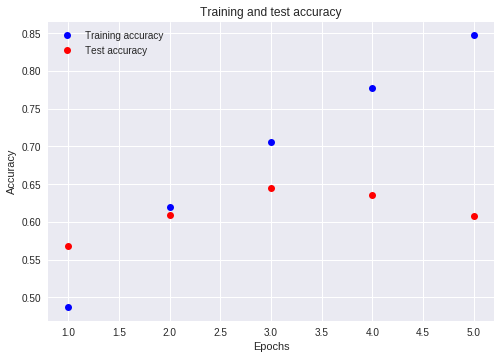

In [0]:
acc_values_one = history_dict_one['acc']
test_acc_values_one = history_dict_one['val_acc']

plt.plot(epochs_range_one, acc_values_one, 'bo', label='Training accuracy')
plt.plot(epochs_range_one, test_acc_values_one, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Does well on the validation set, but the test accuracy starts to fall with later epochs.

Model with only a filter and no maxpooling performs very slowly and poorly

In [0]:
history_dict = history_two.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = history_three.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = history_four.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = history_five.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = history_six.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()